# Query Prediction

In [1]:
import os
import pandas as pd
import seaborn as sns

os.chdir(os.path.expanduser('~/.deeppavlov/downloads/query_prediction'))
os.listdir()

['valid.csv', 'train.csv', 'test.csv']

In [2]:
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Question,Class
0,"""How many movies did Stanley Kubrick direct?""",0
1,"""Which city's foundeer is John Forbes?""",2
2,"""What is the river whose mouth is in deadsea?""",2
3,"""What is the allegiance of John Kotelawala ?""",2
4,"""How many races have the horses bred by Jacque...",0


In [4]:
train_df.shape

(4000, 2)

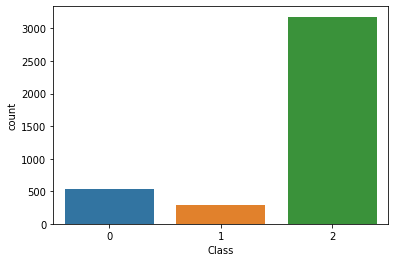

In [5]:
sns.countplot(train_df['Class'])

In [6]:
valid_df.shape

(1000, 2)

In [7]:
valid_df

,Question,Class
0,"""Which architect of Marine Corps Air Station K...",2
1,"""Which sects people are part of local politica...",2
2,"""List common systems are developed by of the G...",2
3,"""For which games are Sam Loyd and Eric Schille...",2
4,"""Is Peter Piper Pizza in the pizza industry?""",1
...,...,...
995,"""Who is venerated in Judaism and Islam?""",2
996,"""Count the number teams which have former ice...",0
997,"""Name the common editor of Easy Street (film) ...",2
998,"""List all the schools of the rugby player whos...",2


In [8]:
combined_df = train_df.append(valid_df, ignore_index=True)
combined_df.shape

(5000, 2)

In [9]:
combined_df.duplicated().value_counts()

False    4998
True        2
dtype: int64

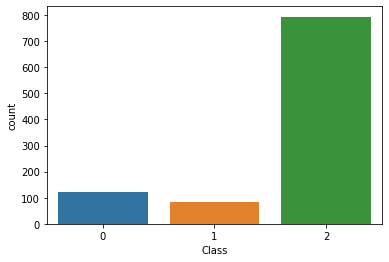

In [10]:
sns.countplot(valid_df['Class'])

In [11]:
test_df.shape

(1000, 2)

In [12]:
test_df

,Question,Class
0,"""Which architect of Marine Corps Air Station K...",2
1,"""Which sects people are part of local politica...",2
2,"""List common systems are developed by of the G...",2
3,"""For which games are Sam Loyd and Eric Schille...",2
4,"""Is Peter Piper Pizza in the pizza industry?""",1
...,...,...
995,"""Who is venerated in Judaism and Islam?""",2
996,"""Count the number teams which have former ice...",0
997,"""Name the common editor of Easy Street (film) ...",2
998,"""List all the schools of the rugby player whos...",2


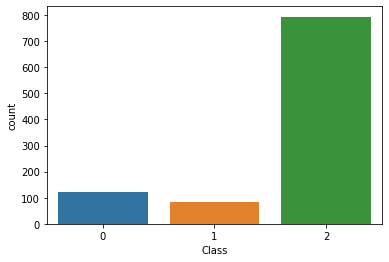

In [13]:
sns.countplot(test_df['Class'])

# LCQUAD

In [14]:
os.chdir("../lcquad")
os.listdir()

['entity_and_type_detection_BIO.pickle',
 'entity_detection_dataset.pickle',
 'entity_and_type_detection.pickle']

In [15]:
import pickle

with open('entity_and_type_detection_BIO.pickle', 'rb') as f:
    content = pickle.load(f)
    
for k, v in content.items():
    print(f"{k}: {len(v)}")

train: 13924
valid: 2273
test: 2273


# Rel ranking

In [16]:
os.chdir("../rel_ranking_bert")
os.listdir()

['paraphrases.xml',
 'rel_ranking_bert_minus_1.tar.gz',
 'paraphrases_gold.xml',
 'old']

In [17]:
import sys
sys.path += [os.path.expanduser('~/DeepPavlov')]

In [18]:
from deeppavlov.dataset_readers.paraphraser_reader import ParaphraserReader

[nltk_data] Downloading package punkt to /home/anton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/anton/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/anton/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [19]:
reader = ParaphraserReader()
data = reader.read(data_path='.', do_lower_case=False)

(ParaphraserReader._build_data)paraphrase: {}
(ParaphraserReader._build_data)paraphrase.find('value[@name="class"]'): <Element 'value' at 0x7f62c07227d0>
(ParaphraserReader._build_data)paraphrase.find('value[@name="class"]').text: -1


In [20]:
for k, v in data.items():
    print(f"{k}: {len(v)}")

train: 378344
valid: 0
test: 95196


In [21]:
data_pd = {}
for k, v in data.items():
    if len(v) > 0:
        texts, classes = zip(*v)
        data_pd[k] = pd.DataFrame({'texts': texts, 'class': classes})

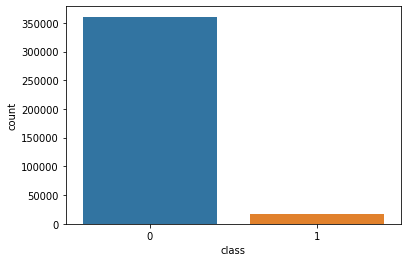

In [22]:
sns.countplot(data_pd['train']['class'])

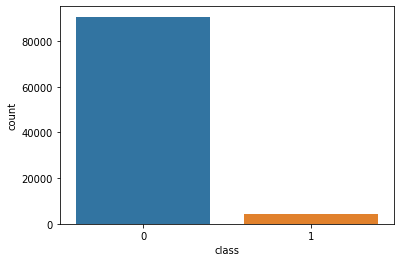

In [23]:
sns.countplot(data_pd['test']['class'])

In [24]:
pd.set_option('display.max_colwidth', -1)
data_pd['test']

,texts,class
0,"(Who is the country for head of state of Mahmoud Abbas, head of state)",1
1,"(Who is the country for head of state of Mahmoud Abbas, radix [SEP] month of the year)",0
2,"(Who is the country for head of state of Mahmoud Abbas, has natural reservoir [SEP] sports league level)",0
3,"(Who is the country for head of state of Mahmoud Abbas, time of spacecraft launch [SEP] manifestation of)",0
4,"(Who is the country for head of state of Mahmoud Abbas, allegiance [SEP] quantity symbol)",0
...,...,...
95191,"(What Theoi Project ID does Manticore has?, cause of destruction [SEP] has quality)",0
95192,"(What Theoi Project ID does Manticore has?, periapsis date [SEP] width)",0
95193,"(What Theoi Project ID does Manticore has?, Roman nomen gentilicium [SEP] rotation period)",0
95194,"(What Theoi Project ID does Manticore has?, unit symbol [SEP] direction)",0


In [25]:
data_pd['test'].loc[1, "texts"]

('Who is the country for head of state of Mahmoud Abbas',
 'radix [SEP] month of the year')

# Check f1_score

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_true = [0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 1, 1, 1, 1]

print("recall:", recall_score(y_true, y_pred))
print("precision:", precision_score(y_true, y_pred))
print("f1:", f1_score(y_true, y_pred))

y_true = [0, 0, 1, 2, 2, 2, 2, 2, 2, 2]
y_pred = [0, 1, 1, 2, 2, 2, 2, 2, 2, 2]

print()
print("f1:", f1_score(y_true, y_pred, average='macro'))

recall: 1.0
precision: 0.875
f1: 0.9333333333333333

f1: 0.7777777777777777
